In [1]:
from matplotlib import animation
from from_wave import *

save_path = "../plots"

Standard animation

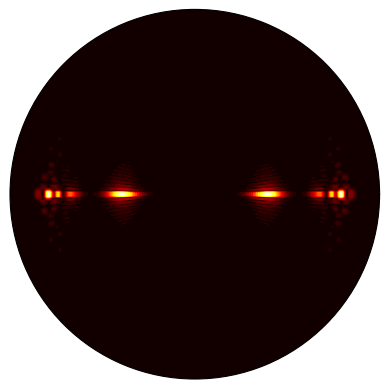

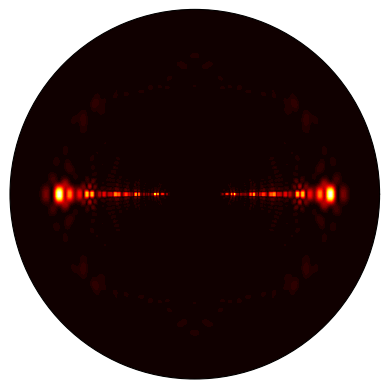

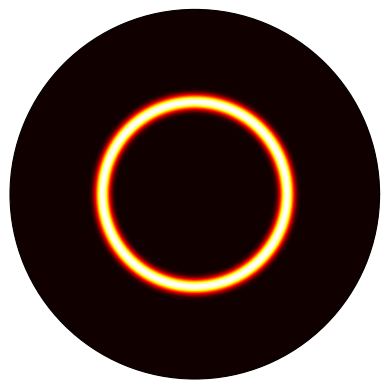

In [23]:
anim = wave_animation("hyq_0.5")
anim.save(f'{save_path}/hyq_0.5_wave_animation.gif', writer="pillow", fps=30)

anim = wave_animation("hyq_0.1")
anim.save(f'{save_path}/hyq_0.1_wave_animation.gif', writer="pillow", fps=30)

anim = wave_animation("hyq_0.05")
anim.save(f'{save_path}/hyq_0.05_wave_animation.gif', writer="pillow", fps=30)

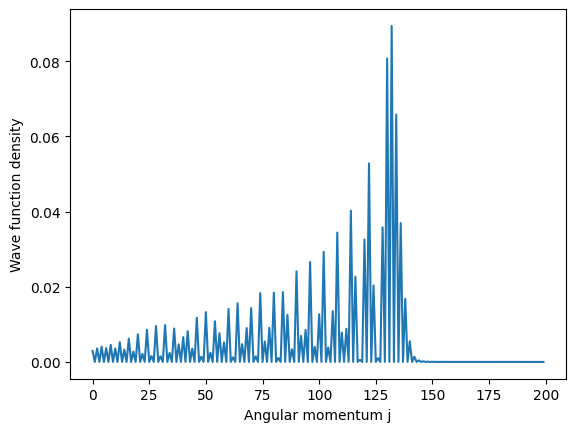

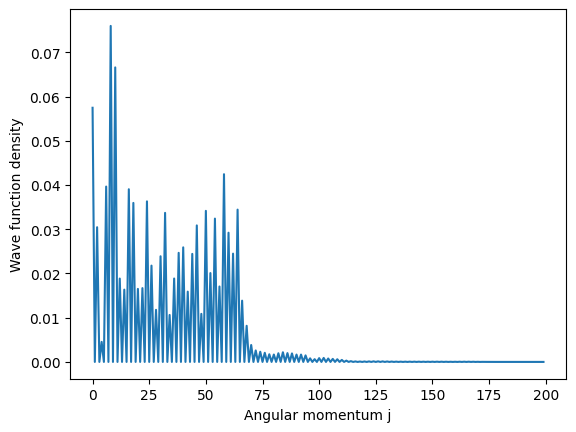

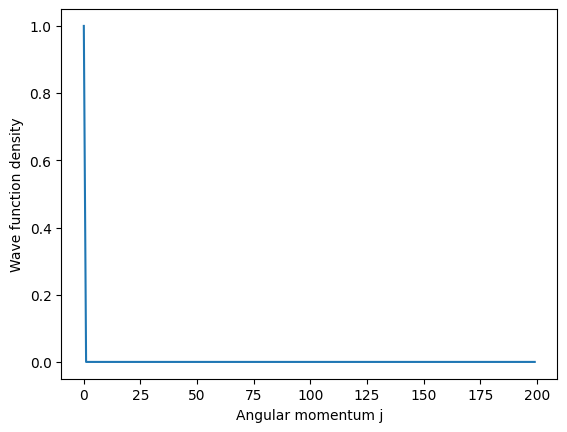

In [24]:
anim = angular_animation("hyq_0.5")
anim.save(f'{save_path}/hyq_0.5_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("hyq_0.1")
anim.save(f'{save_path}/hyq_0.1_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("hyq_0.05")
anim.save(f'{save_path}/hyq_0.05_angular_animation.gif', writer="pillow", fps=30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


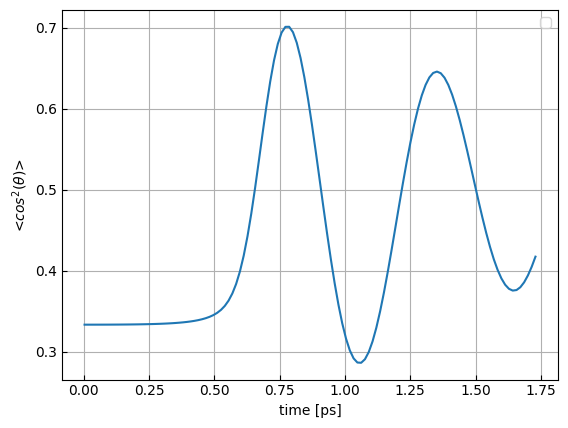

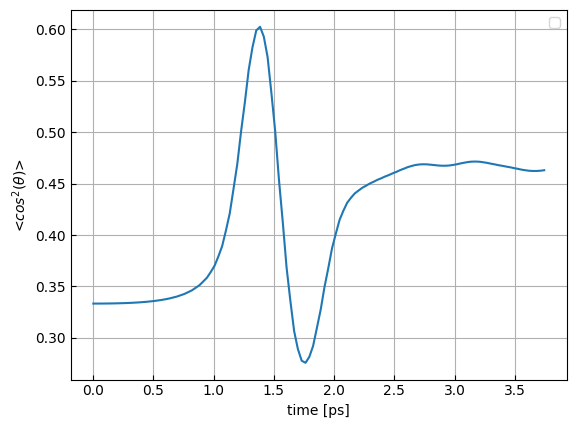

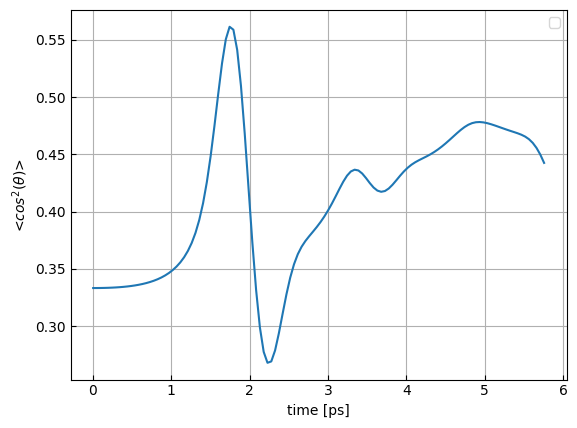

In [2]:
fig, ax = alignement("hyq_0.5")
fig, ax = alignement("hyq_0.1")
fig, ax = alignement("hyq_0.05")

(0.0, 5.0)

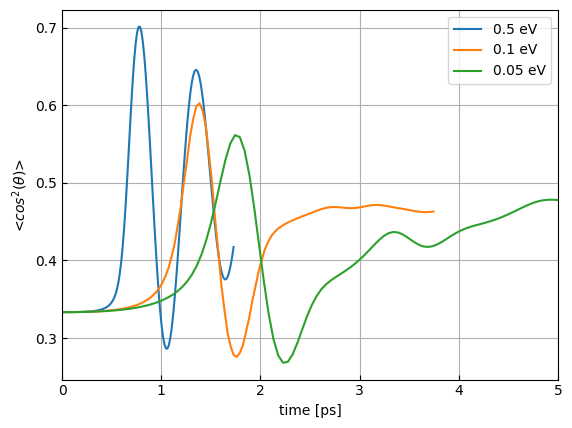

In [3]:
fig, ax = alignements(["hyq_0.5", "hyq_0.1", "hyq_0.05"])
ax.legend(["0.5 eV", "0.1 eV", "0.05 eV"])
ax.set_xlim(0, 5)

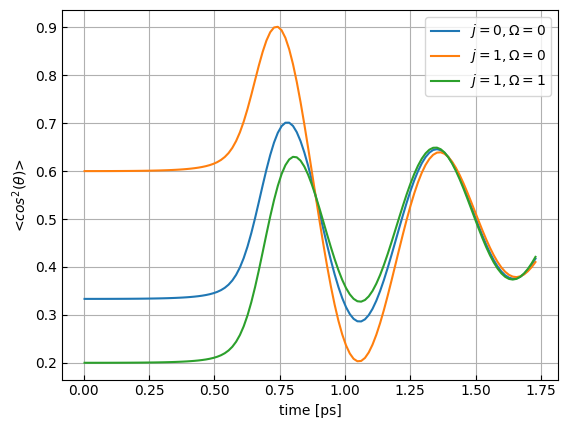

In [4]:
fig, ax = alignements(["hyq_0_0", "hyq_1_0", "hyq_1_1"])
ax.legend(["$j = 0, \Omega = 0$", "$j = 1, \Omega = 0$", "$j = 1, \Omega = 1$"])